In [1]:
# Fragen / Ziele : 
# 1. How have global emissions of carbon dioxide (CO2) changed over time?
# 2. Welche Länder haben in den letzten 20 Jahren ihre Emissionen reduziert oder gesteigert?
# 3. Who emits the most CO2 each year?
# 4. Welche Sektoren (z. B. Energie, Industrie, Verkehr) tragen am meisten zu den Emissionen bei?
# 5. Where in the world does the average person emit the most carbon dioxide (CO2) each year?
# 6. How have global emissions of carbon dioxide (CO2) from fossil fuels and land use changed over time?
# 7. Gibt es Korrelationen zwischen dem Wirtschaftswachstum (BIP) und den Emissionen?
#     - Trends: Ab wann haben sich die Emissionen verschlechtert oder im besten Fall reduziert? Haben die Maßnahmen der EU gegriffen?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px



In [3]:
df = pd.read_csv('/Users/constantinfuss/visCode/Portfolioproject/DPP_2501/Visualisierung/df_1900_fil.csv')
print(df.head())

   Unnamed: 0 country  year iso_code   population  gdp  cement_co2  \
0         424  Africa  1900        0  138755559.0  0.0         0.0   
1         425  Africa  1901        0  139195205.0  0.0         0.0   
2         426  Africa  1902        0  139666271.0  0.0         0.0   
3         427  Africa  1903        0  140170120.0  0.0         0.0   
4         428  Africa  1904        0  140688001.0  0.0         0.0   

   cement_co2_per_capita     co2  co2_growth_abs  ...  \
0                    0.0  2330.0         -3188.0  ...   
1                    0.0  3909.0          1579.0  ...   
2                    0.0  5826.0          1916.0  ...   
3                    0.0  7896.0          2070.0  ...   
4                    0.0  8911.0          1015.0  ...   

   share_of_temperature_change_from_ghg  temperature_change_from_ch4  \
0                                4398.0                          2.0   
1                                4365.0                          2.0   
2                   

In [4]:
df_world = pd.read_csv('/Users/constantinfuss/visCode/Portfolioproject/DPP_2501/Data.csv', sep=',', decimal=',', thousands='.')
df_world
df_world = df_world[(df_world['country'] == 'World')&(df_world['year']>=1900)]
df_world = df_world.fillna(0)
df_world.head()

/var/folders/qx/59cmtxnj3k39s67d_t_xhvx40000gn/T/ipykernel_13322/1575011719.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_world = df_world.fillna(0)


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
49445,World,1900,0,1.670636e+09,3.503708e+15,1.0,0.0,1961491.0,98355.0,5279.0,...,0.0,100000.0,31.0,93.0,129.0,5.0,8691973.0,2796570.0,0.0,0.0
49446,World,1901,0,0.000000e+00,0.000000e+00,2.0,0.0,2023964.0,62473.0,3185.0,...,0.0,100000.0,32.0,96.0,133.0,5.0,8804860.0,2870028.0,0.0,0.0
49447,World,1902,0,0.000000e+00,0.000000e+00,2.0,0.0,2074800.0,50836.0,2512.0,...,0.0,100000.0,33.0,99.0,137.0,5.0,8971303.0,2928892.0,0.0,0.0
49448,World,1903,0,0.000000e+00,0.000000e+00,3.0,0.0,2262046.0,187246.0,9025.0,...,0.0,100000.0,34.0,102.0,141.0,5.0,9167074.0,3141621.0,0.0,0.0
49449,World,1904,0,0.000000e+00,0.000000e+00,3.0,0.0,2287509.0,25463.0,1126.0,...,0.0,100000.0,35.0,105.0,146.0,5.0,9294473.0,3173260.0,0.0,0.0


In [5]:
# FRAGE 1:    Wie haben sich die CO2-Emissionen über den betrachteten Zeitraum weltweit verwändert?
peak_indices = df_world.groupby('country')['co2'].idxmax()
peak = df_world.loc[peak_indices]
fig_co2 = px.line(df_world, x='year', y='co2', color='country', title='Entwicklung CO₂ Emissionen in Mio. t')

for _, row in peak.iterrows():
    fig_co2.add_annotation(
        x=row['year'],
        y=row['co2'],
        text=f"Peak: {row['co2']:.2f}",
        showarrow=True,
        arrowhead=3,
        ax=0,
        ay=-40
    )
fig_co2.update_layout(xaxis_title='Jahr', yaxis_title='CO₂ Emissionen in Mio. t', plot_bgcolor='rgba(245,245,245,1)')
fig_co2.show()

fig_co2.write_image('CO2_emissions_over_timeWORLD.png')

In [6]:
#FRAGE 1:   Top 5 nach nominalem BIP (USD)
top_countries = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom']

df_top = df[(df['country'].isin(top_countries)) & (df['year']< 2023)]
# Plotly-Liniendiagramm
fig = px.line(
    df_top,
    x='year',
    y='gdp_per_capita',
    color='country',
    title='BIP der Top-5-Länder (1900-2022)',
    labels={'GDP': 'Bruttoinlandsprodukt (in Milliarden USD)', 'Year': 'Jahr'}
)
fig.update_layout(xaxis_title='Jahr', yaxis_title='BIP pro Kopf (USD)', plot_bgcolor='rgba(245,245,245,1)')
# Plot anzeigen
fig.show()
fig.write_image('GDP_top5_länder.png')


In [7]:
#Welche Länder haben ihre Emissionen im betrachteten Zeitraum reduziert? Vergleich 2005(Inkrafttreten des Emissionshandels) bis 2022 bzw. 2023.

co2_differences = []
for country in df['country'].unique():
    #Daten für das aktuelle Land filtern
    country_data = df[df['country'] == country]

    #CO2_Werte für 2000 und 2022 extrahieren:
    co2_2005 = country_data.loc[country_data['year']==2005, 'co2']
    co2_2022 = country_data.loc[country_data['year']==2022, 'co2']
    ghg_2005 = country_data.loc[country_data['year']==2005, 'total_ghg']
    ghg_2022 = country_data.loc[country_data['year']==2022, 'total_ghg']

    #Sicherstellen das beide Werte existieren
    if not co2_2005.empty and not co2_2022.empty:
        co2_diff = round((co2_2022.values[0]*100) / co2_2005.values[0], 2)
        ghg_diff = round((ghg_2022.values[0]*100) / ghg_2005.values[0], 2)
        co2_differences.append({'country': country, 'co2_difference': co2_diff, 'ghg_difference': ghg_diff})
    else:
        co2_differences.append({'country': country, 'co2_difference': None, 'ghg_difference': None})

# In df 
co2_change = pd.DataFrame(co2_differences).sort_values(by= 'co2_difference',ascending=False)

co2_change

,country,co2_difference,ghg_difference
15,India,237.00,176.22
16,Indonesia,212.04,137.99
5,China,192.97,174.80
0,Africa,135.22,116.82
27,South Korea,120.74,121.68
25,Poland,97.61,94.24
4,Canada,96.12,89.48
3,Bulgaria,92.66,100.53
21,Lithuania,92.49,116.72
7,Cyprus,90.45,111.57


In [8]:
# Frage 1 Zusatz: 
fig_diff = px.bar(co2_change, x='country', y='co2_difference', title= 'Entwicklung der Emissionen im Vergleich 2005 zu 2022') 
fig_diff.update_traces(marker_color = 'steelblue')
fig_diff.show()

In [9]:
import plotly.graph_objects as go


In [10]:
#FRAGE 2: Wer hat seine Emissionen reduziert oder erhöht?
fig_diff_group = go.Figure(data=[
    go.Bar(name = 'co2_difference', x = co2_change['country'], y=co2_change['co2_difference'], marker_color = 'darkorange'),
    go.Bar(name = 'ghg_difference', x = co2_change['country'], y=co2_change['ghg_difference'], marker_color = 'steelblue')
])

fig_diff_group.update_layout(title = 'Anstieg der Emissionen im Vergleich 2005 zu 2022 - CO₂ (orange) und Treibhausgase (blau) ', barmode='group', 
                    yaxis_title='in %', 
                    annotations=[
                        dict(
                            text="Treibhausgasemissionen inkludieren CO₂ und Methane, etc.",  # Untertitel
                            x=0.5,  # Zentrieren
                            y=0.91,  # Direkt unter dem Titel
                            xref="paper",
                            yref="paper",
                            showarrow=False,
                            font=dict(size=12, color="gray"))],
                            plot_bgcolor='rgba(245,245,245,1)')
fig_diff_group.show()
fig_diff_group.write_image('entw_emissionen_co2_ghg.png')

In [11]:
#FRAGE 3: wer emitiert die am meisten co2 jedes Jahr? 

max_emi_per_year= df.loc[df.groupby('year')['co2'].idxmax()]
max_emi_per_year.head()

,Unnamed: 0,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita
3844,47676,United States,1900,USA,74829905.0,6.139981e+14,1.0,0.0,662738.0,37204.0,...,28641.0,5.0,31.0,37.0,1.0,2304752.0,803128.0,0.0,0.0,8.205251e+06
3845,47677,United States,1901,USA,76245912.0,6.831060e+14,2.0,0.0,721528.0,58789.0,...,28611.0,5.0,32.0,38.0,1.0,2335970.0,868237.0,0.0,0.0,8.959248e+06
3846,47678,United States,1902,USA,77698268.0,6.901268e+14,2.0,0.0,764496.0,42968.0,...,28583.0,6.0,32.0,39.0,1.0,2374097.0,915763.0,0.0,0.0,8.882139e+06
3847,47679,United States,1903,USA,79187838.0,7.237663e+14,3.0,0.0,894407.0,129911.0,...,28580.0,6.0,33.0,40.0,1.0,2475699.0,1059848.0,0.0,0.0,9.139867e+06
3848,47680,United States,1904,USA,80705948.0,7.146218e+14,3.0,0.0,882058.0,-12349.0,...,28561.0,6.0,34.0,42.0,1.0,2473008.0,1045912.0,0.0,0.0,8.854637e+06


In [12]:
custom_colors={'United States':'steelblue', 'China':'darkorange'}
fig_max_emi = px.bar(
    max_emi_per_year,
    x='year',
    y='co2',
    color='country',
    color_discrete_map=custom_colors,
    title='Größter CO2 Emittent pro Jahr',
    labels={'co2_emissions': 'CO2 Emissions (kt)', 'year': 'Year'}
)
fig_max_emi.update_layout(xaxis_title='Jahr', yaxis_title='CO2 Emissionen (Mio t)')
fig_max_emi.show()
fig_max_emi.write_image('max_emi_per_year.png')

In [13]:
df_share_emi = df.groupby('year')
df_share_emi.head(10)

,Unnamed: 0,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share,gdp_per_capita
0,424,Africa,1900,0,138755559.0,0.000000e+00,0.0,0.0,2330.0,-3188.0,...,4398.0,2.0,4.0,6.0,0.0,319378.0,34964.0,0.0,0.0,0.000000e+00
1,425,Africa,1901,0,139195205.0,0.000000e+00,0.0,0.0,3909.0,1579.0,...,4365.0,2.0,4.0,6.0,0.0,308228.0,37271.0,0.0,0.0,0.000000e+00
2,426,Africa,1902,0,139666271.0,0.000000e+00,0.0,0.0,5826.0,1916.0,...,4335.0,2.0,4.0,6.0,0.0,320250.0,39893.0,0.0,0.0,0.000000e+00
3,427,Africa,1903,0,140170120.0,0.000000e+00,0.0,0.0,7896.0,2070.0,...,4305.0,2.0,4.0,6.0,0.0,322133.0,42600.0,0.0,0.0,0.000000e+00
4,428,Africa,1904,0,140688001.0,0.000000e+00,0.0,0.0,8911.0,1015.0,...,4282.0,2.0,4.0,6.0,0.0,342755.0,44200.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,14466,Estonia,2019,EST,1326821.0,3.772318e+13,295.0,223.0,12288.0,-5513.0,...,68.0,0.0,1.0,1.0,0.0,17519.0,14635.0,2347.0,19096.0,2.843125e+07
1236,14467,Estonia,2020,EST,1329674.0,3.751527e+13,20.0,15.0,9198.0,-3090.0,...,67.0,0.0,1.0,1.0,0.0,13254.0,10441.0,3225.0,35057.0,2.821389e+07
1237,14468,Estonia,2021,EST,1331750.0,4.052148e+13,0.0,0.0,10391.0,1192.0,...,67.0,0.0,1.0,1.0,0.0,14439.0,11655.0,3431.0,33017.0,3.042724e+07
1238,14469,Estonia,2022,EST,1350092.0,3.999986e+13,0.0,0.0,11757.0,1366.0,...,66.0,0.0,1.0,1.0,0.0,15699.0,12879.0,2533.0,21545.0,2.962750e+07


In [14]:
sector_emissions = df[['year', 'country','population', 'co2', 'cement_co2', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2', 'land_use_change_co2', 'trade_co2']]

latest_year = sector_emissions[sector_emissions['year']==2022]
print(latest_year)
sector_emissions_latest = sector_emissions[sector_emissions['year']==2022]

sector_totals = sector_emissions_latest[['cement_co2', 'coal_co2', 'oil_co2', 
                                         'gas_co2', 'flaring_co2', 'land_use_change_co2', 'trade_co2']].sum()

sector_percentages = (sector_totals/sector_totals.sum())*100

sector_summary = pd.DataFrame({
    'Sector': sector_totals.index,
    'Emissions': sector_totals.values,
    'Percentage': sector_percentages.values})

sector_summary

      year         country    population         co2  cement_co2   coal_co2  \
122   2022          Africa  1.446884e+09   1432503.0     83513.0   404326.0   
246   2022         Austria  9.064679e+06     61489.0      1832.0    11666.0   
370   2022         Belgium  1.164181e+07     89002.0      2456.0    11941.0   
494   2022        Bulgaria  6.825863e+06     46966.0      1040.0    24577.0   
618   2022          Canada  3.882126e+07    550612.0      6752.0    38198.0   
742   2022           China  1.425180e+09  11350538.0    756020.0  8168899.0   
866   2022         Croatia  3.907031e+06     17608.0      1099.0     1628.0   
990   2022          Cyprus  1.331376e+06      7198.0       880.0      123.0   
1114  2022         Czechia  1.067322e+07     95108.0      1847.0    52973.0   
1238  2022         Estonia  1.350092e+06     11757.0         0.0     7877.0   
1362  2022         Finland  5.569299e+06     36367.0       597.0    12145.0   
1486  2022          France  6.627741e+07    293502.0

,Sector,Emissions,Percentage
0,cement_co2,1193741.0,4.255218
1,coal_co2,13194580.0,47.033496
2,oil_co2,7327332.0,26.119061
3,gas_co2,4418414.0,15.749911
4,flaring_co2,167441.0,0.596861
5,land_use_change_co2,1524594.0,5.434579
6,trade_co2,227479.0,0.810873


In [15]:
sectors = ['cement_co2', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2', 'trade_co2']
sector_emissions.loc[:, 'total_sector_emissions'] = sector_emissions[sectors].sum(axis=1)
#ÜBERLEGEN OB MAN HIER NICHT DIREKT PER CAPITA DIE CO" WERTE AUSRECHNET; DAMIT MAN EINEN VERGLEICH PER CAPITA ERHÄLT WELCHE CO" QUELLE AM MEISTEN VERWENDET WIRD

sector_emissions.loc[:, 'co2 cement per capita'] = np.where(sector_emissions.loc[:,'cement_co2'], (sector_emissions.loc[:,'cement_co2']/sector_emissions.loc[:,'population']), 0)
sector_emissions.loc[:, 'co2 coal per capita'] = np.where(sector_emissions.loc[:,'coal_co2'], (sector_emissions.loc[:,'coal_co2']/sector_emissions.loc[:,'population']), 0)
sector_emissions.loc[:, 'co2 oil per capita'] = np.where(sector_emissions.loc[:,'oil_co2'], (sector_emissions.loc[:,'oil_co2']/sector_emissions.loc[:,'population']), 0)
sector_emissions.loc[:, 'co2 gas per capita'] = np.where(sector_emissions.loc[:,'gas_co2'], (sector_emissions.loc[:,'gas_co2']/sector_emissions.loc[:,'population']), 0)
sector_emissions.loc[:, 'co2 flaring per capita'] = np.where(sector_emissions.loc[:,'flaring_co2'], (sector_emissions.loc[:,'flaring_co2']/sector_emissions.loc[:,'population']), 0)
sector_emissions.loc[:, 'co2 trade per capita'] = np.where(sector_emissions.loc[:,'trade_co2'], (sector_emissions.loc[:,'trade_co2']/sector_emissions.loc[:,'population']), 0)
sector_emissions

/var/folders/qx/59cmtxnj3k39s67d_t_xhvx40000gn/T/ipykernel_13322/1939751571.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qx/59cmtxnj3k39s67d_t_xhvx40000gn/T/ipykernel_13322/1939751571.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qx/59cmtxnj3k39s67d_t_xhvx40000gn/T/ipykernel_13322/1939751571.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,year,country,population,co2,cement_co2,coal_co2,oil_co2,gas_co2,flaring_co2,land_use_change_co2,trade_co2,total_sector_emissions,co2 cement per capita,co2 coal per capita,co2 oil per capita,co2 gas per capita,co2 flaring per capita,co2 trade per capita
0,1900,Africa,138755559.0,2330.0,0.0,2330.0,0.0,0.0,0.0,296163.0,0.0,2330.0,0.000000,0.000017,0.000000,0.000000,0.000000,0.000000
1,1901,Africa,139195205.0,3909.0,0.0,3909.0,0.0,0.0,0.0,281912.0,0.0,3909.0,0.000000,0.000028,0.000000,0.000000,0.000000,0.000000
2,1902,Africa,139666271.0,5826.0,0.0,5826.0,0.0,0.0,0.0,292659.0,0.0,5826.0,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000
3,1903,Africa,140170120.0,7896.0,0.0,7896.0,0.0,0.0,0.0,287889.0,0.0,7896.0,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000
4,1904,Africa,140688001.0,8911.0,0.0,8911.0,0.0,0.0,0.0,304128.0,0.0,8911.0,0.000000,0.000063,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,2019,United States,337790068.0,5262145.0,40896.0,1071666.0,2360999.0,1675471.0,88437.0,58163.0,436630.0,5674099.0,0.000121,0.003173,0.006990,0.004960,0.000262,0.001293
3964,2020,United States,339436157.0,4714628.0,40688.0,877920.0,2047544.0,1656255.0,67749.0,57984.0,472234.0,5162390.0,0.000120,0.002586,0.006032,0.004879,0.000200,0.001391
3965,2021,United States,340161441.0,5032213.0,41312.0,1004759.0,2238883.0,1659128.0,63294.0,93629.0,537591.0,5544967.0,0.000121,0.002954,0.006582,0.004877,0.000186,0.001580
3966,2022,United States,341534041.0,5078871.0,41418.0,942357.0,2258467.0,1748499.0,63294.0,102273.0,563985.0,5618020.0,0.000121,0.002759,0.006613,0.005120,0.000185,0.001651


In [16]:
# FRAGE 4: Sectoren die meisten co2 emittieren je Land von 2005 bis 2022
emi_countries = ['United States', 'Germany', 'India', 'Africa', 'China']
sec_emi = sector_emissions[(sector_emissions['country'].isin(emi_countries)) & (sector_emissions['year']==2022) ]

fig_sec_emi = go.Figure(data=[
    go.Bar(name = 'share_cement', x = sec_emi['country'], y=sec_emi['co2 cement per capita'], marker_color = 'grey'),
    go.Bar(name = 'share_coal', x = sec_emi['country'], y=sec_emi['co2 coal per capita'], marker_color = 'darkorange'),
    go.Bar(name = 'share_oil', x = sec_emi['country'], y=sec_emi['co2 oil per capita'], marker_color = 'red'),
    go.Bar(name = 'share_gas', x = sec_emi['country'], y=sec_emi['co2 gas per capita'], marker_color = 'lightblue'),
    go.Bar(name = 'share_flaring', x = sec_emi['country'], y=sec_emi['co2 flaring per capita'], marker_color = 'steelblue'),
    go.Bar(name = 'share_trade', x = sec_emi['country'], y=sec_emi['co2 trade per capita'], marker_color = 'pink')
])

fig_sec_emi.update_layout(title = 'Verteilung CO₂ per Capita 2022 im Vergleich zum Vorjahr', barmode='group', plot_bgcolor='rgba(245,245,245,1)')
                    #annotations=[
                        # dict(
                        #     text="ghg_difference beinhaltet die gesamten Emissionen von co2 + n2o, etc",  # Untertitel
                        #     x=0.5,  # Zentrieren
                        #     y=0.91,  # Direkt unter dem Titel
                        #     xref="paper",
                        #     yref="paper",
                        #     showarrow=False,
                        #     font=dict(size=12, color="gray"))])
fig_sec_emi.show()

In [17]:
# Sectoren die meisten co2 emittieren je Land von 2005 bis 2022
emi_countries = ['United States', 'Germany', 'India', 'Africa', 'China']
sec_emi = sector_emissions[(sector_emissions['country'].isin(emi_countries)) & (sector_emissions['year']==2022)]

fig_sec_emi = go.Figure(data=[
    go.Bar(name = 'share_cement', x = sec_emi['country'], y=sec_emi['cement_co2'], marker_color = 'grey'),
    go.Bar(name = 'share_coal', x = sec_emi['country'], y=sec_emi['coal_co2'], marker_color = 'darkorange'),
    go.Bar(name = 'share_oil', x = sec_emi['country'], y=sec_emi['oil_co2'], marker_color = 'red'),
    go.Bar(name = 'share_gas', x = sec_emi['country'], y=sec_emi['gas_co2'], marker_color = 'lightblue'),
    go.Bar(name = 'share_flaring', x = sec_emi['country'], y=sec_emi['flaring_co2'], marker_color = 'steelblue'),
    go.Bar(name = 'share_trade', x = sec_emi['country'], y=sec_emi['trade_co2'], marker_color = 'pink')
])

fig_sec_emi.update_layout(title = 'Verteilung Emittenten je Land 2022 im Vergleich zum Vorjahr', barmode='group', plot_bgcolor='rgba(245,245,245,1)')
                    #annotations=[
                        # dict(
                        #     text="ghg_difference beinhaltet die gesamten Emissionen von co2 + n2o, etc",  # Untertitel
                        #     x=0.5,  # Zentrieren
                        #     y=0.91,  # Direkt unter dem Titel
                        #     xref="paper",
                        #     yref="paper",
                        #     showarrow=False,
                        #     font=dict(size=12, color="gray"))])
fig_sec_emi.show()


In [18]:
fig_share = px.bar(sector_summary, x='Sector', y='Percentage', title='Anteil der CO₂-Verursacher im Jahr 2022')
fig_share.update_traces(marker_color = ['grey', 'darkorange', 'red', 'lightblue', 'steelblue', 'pink'])
fig_share.update_layout(xaxis_title='Sektor', yaxis_title='Anteil in %', plot_bgcolor='rgba(245,245,245,1)')
fig_share.show()
fig_share.write_image('Anteile_CO2Verursacher.png')

In [19]:
sec_sum = sector_emissions[sector_emissions['year']==2022]
secto_sum = sec_sum['co2'].sum()
print(secto_sum)
sect_sum = sector_summary['Emissions'].sum()
print(sect_sum)

26556087.0
28053581.0


In [20]:
sector_emissions[(sector_emissions['country']== 'China') & (sector_emissions['year'] < 2023) & (sector_emissions['year'] >= 2005)].tail(30)

,year,country,population,co2,cement_co2,coal_co2,oil_co2,gas_co2,flaring_co2,land_use_change_co2,trade_co2,total_sector_emissions,co2 cement per capita,co2 coal per capita,co2 oil per capita,co2 gas per capita,co2 flaring per capita,co2 trade per capita
725,2005,China,1.310027e+09,5882106.0,411649.0,4424353.0,850173.0,84957.0,5588.0,325656.0,-1163779.0,4612941.0,0.000314,0.003377,0.000649,0.000065,0.000004,-0.000888
726,2006,China,1.318054e+09,6494331.0,470087.0,4905367.0,898534.0,103753.0,5534.0,329761.0,-1358414.0,5024861.0,0.000357,0.003722,0.000682,0.000079,0.000004,-0.001031
727,2007,China,1.325814e+09,6983547.0,514981.0,5289875.0,927351.0,129515.0,4965.0,311211.0,-1436465.0,5430222.0,0.000388,0.003990,0.000699,0.000098,0.000004,-0.001083
728,2008,China,1.333821e+09,7501498.0,525924.0,5729473.0,970118.0,149674.0,4666.0,313299.0,-1532080.0,5847775.0,0.000394,0.004296,0.000727,0.000112,0.000003,-0.001149
729,2009,China,1.342523e+09,7891078.0,583560.0,6028489.0,982348.0,164404.0,4557.0,320857.0,-1169984.0,6593374.0,0.000435,0.004490,0.000732,0.000122,0.000003,-0.000871
730,2010,China,1.351562e+09,8620576.0,639592.0,6568743.0,1092571.0,199585.0,3974.0,-41239.0,-1283493.0,7220972.0,0.000473,0.004860,0.000808,0.000148,0.000003,-0.000950
731,2011,China,1.360251e+09,9532332.0,708564.0,7309709.0,1123859.0,245990.0,3853.0,17009.0,-1392463.0,7999512.0,0.000521,0.005374,0.000826,0.000181,0.000003,-0.001024
732,2012,China,1.369521e+09,9779292.0,714782.0,7464744.0,1176712.0,277599.0,3733.0,16146.0,-1280388.0,8357182.0,0.000522,0.005451,0.000859,0.000203,0.000003,-0.000935
733,2013,China,1.379008e+09,9956329.0,748323.0,7493408.0,1234621.0,320127.0,3632.0,17266.0,-1231844.0,8568267.0,0.000543,0.005434,0.000895,0.000232,0.000003,-0.000893
734,2014,China,1.387952e+09,9990257.0,770284.0,7424993.0,1255605.0,370222.0,3930.0,-130691.0,-1183674.0,8641360.0,0.000555,0.005350,0.000905,0.000267,0.000003,-0.000853


In [21]:
#sec_emi['sector_shared_emissions_cement'].mean()

In [22]:
# FRAGE 5: WEr emittiert am meisten co2 jedes Jahr pro Capita?
# Gedanke die Spalte co2 zu verwenden und dann noch die consumption per Capita als vergleich bzw. entscheiden welche Spalte die sinnvollere ist

sector_emissions.loc[:,'co2_per_capita'] = sector_emissions.loc[:,'co2']/sector_emissions.loc[:,'population']
sector_emissions
per_cap = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'Africa']
filtered_data = sector_emissions[(sector_emissions.loc[:,'country'].isin(per_cap)) & (sector_emissions.loc[:,'year'] >= 1900)]



fig_co2_per_cap = px.line(filtered_data, x='year', y='co2_per_capita', color='country')
fig_co2_per_cap.update_layout(
    xaxis_title = 'Jahr (von 1900 bis 2022)',
    yaxis_title = 'CO₂-Emissionen per Capita (in Million t)',
    title={'text' : 'CO₂ Emissionen pro Kopf von 1900 bis 2022'},
    plot_bgcolor='rgba(245,245,245,1)'
)

fig_co2_per_cap.show()
fig_co2_per_cap.write_image('co2_per_capita.png')

#     # x='year', 
#     # y='co2_per_capita',
#     # color='country',  # Farben für jedes Land
#     # title='CO2 Emissions per Capita Over Time',
#     # labels={'co2_per_capita': 'CO2 per Capita', 'year': 'Year'},
#     # template='plotly_white'





/var/folders/qx/59cmtxnj3k39s67d_t_xhvx40000gn/T/ipykernel_13322/1897674523.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
sector_emissions.isna().sum()


year                      0
country                   0
population                0
co2                       0
cement_co2                0
coal_co2                  0
oil_co2                   0
gas_co2                   0
flaring_co2               0
land_use_change_co2       0
trade_co2                 0
total_sector_emissions    0
co2 cement per capita     0
co2 coal per capita       0
co2 oil per capita        0
co2 gas per capita        0
co2 flaring per capita    0
co2 trade per capita      0
co2_per_capita            0
dtype: int64

In [24]:
sector_emissions.dtypes

year                        int64
country                    object
population                float64
co2                       float64
cement_co2                float64
coal_co2                  float64
oil_co2                   float64
gas_co2                   float64
flaring_co2               float64
land_use_change_co2       float64
trade_co2                 float64
total_sector_emissions    float64
co2 cement per capita     float64
co2 coal per capita       float64
co2 oil per capita        float64
co2 gas per capita        float64
co2 flaring per capita    float64
co2 trade per capita      float64
co2_per_capita            float64
dtype: object

In [25]:
sector_emissions['gdp'] = df['gdp']

/var/folders/qx/59cmtxnj3k39s67d_t_xhvx40000gn/T/ipykernel_13322/3173539877.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
sector_emissions.head()

,year,country,population,co2,cement_co2,coal_co2,oil_co2,gas_co2,flaring_co2,land_use_change_co2,trade_co2,total_sector_emissions,co2 cement per capita,co2 coal per capita,co2 oil per capita,co2 gas per capita,co2 flaring per capita,co2 trade per capita,co2_per_capita,gdp
0,1900,Africa,138755559.0,2330.0,0.0,2330.0,0.0,0.0,0.0,296163.0,0.0,2330.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.000017,0.0
1,1901,Africa,139195205.0,3909.0,0.0,3909.0,0.0,0.0,0.0,281912.0,0.0,3909.0,0.0,0.000028,0.0,0.0,0.0,0.0,0.000028,0.0
2,1902,Africa,139666271.0,5826.0,0.0,5826.0,0.0,0.0,0.0,292659.0,0.0,5826.0,0.0,0.000042,0.0,0.0,0.0,0.0,0.000042,0.0
3,1903,Africa,140170120.0,7896.0,0.0,7896.0,0.0,0.0,0.0,287889.0,0.0,7896.0,0.0,0.000056,0.0,0.0,0.0,0.0,0.000056,0.0
4,1904,Africa,140688001.0,8911.0,0.0,8911.0,0.0,0.0,0.0,304128.0,0.0,8911.0,0.0,0.000063,0.0,0.0,0.0,0.0,0.000063,0.0


In [27]:
import statsmodels.formula.api as smf

print(sector_emissions.head())
print(sector_emissions.info())

   year country   population     co2  cement_co2  coal_co2  oil_co2  gas_co2  \
0  1900  Africa  138755559.0  2330.0         0.0    2330.0      0.0      0.0   
1  1901  Africa  139195205.0  3909.0         0.0    3909.0      0.0      0.0   
2  1902  Africa  139666271.0  5826.0         0.0    5826.0      0.0      0.0   
3  1903  Africa  140170120.0  7896.0         0.0    7896.0      0.0      0.0   
4  1904  Africa  140688001.0  8911.0         0.0    8911.0      0.0      0.0   

   flaring_co2  land_use_change_co2  trade_co2  total_sector_emissions  \
0          0.0             296163.0        0.0                  2330.0   
1          0.0             281912.0        0.0                  3909.0   
2          0.0             292659.0        0.0                  5826.0   
3          0.0             287889.0        0.0                  7896.0   
4          0.0             304128.0        0.0                  8911.0   

   co2 cement per capita  co2 coal per capita  co2 oil per capita  \
0    

In [28]:
# alle nan_werte löschen

sector_emissions = sector_emissions.dropna(subset = ['gdp', 'co2'])
model=smf.ols('co2 ~ gdp', data=sector_emissions)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    co2   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:27:15   Log-Likelihood:                -57047.
No. Observations:                3968   AIC:                         1.141e+05
Df Residuals:                    3966   BIC:                         1.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.373e-26   4.58e-28    139.063      0.0

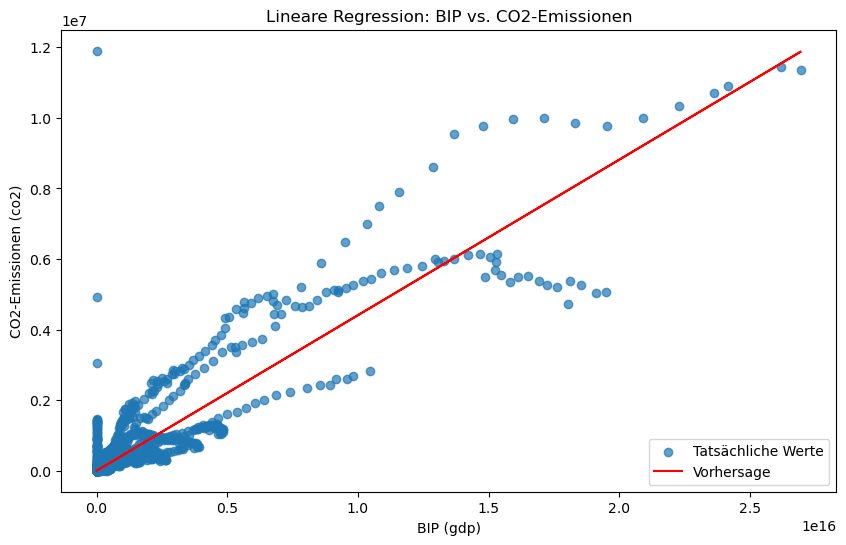

In [29]:
# FRAGE 7: Gibt es Korrelationen zwischen dem Wirtschaftswachstum (BIP) und den Emissionen?
# Tatsächliche vs. vorhergesagte Werte
sector_emissions['y_hat'] = results.predict(sector_emissions)

plt.figure(figsize=(10, 6))
plt.scatter(sector_emissions['gdp'], sector_emissions['co2'], label='Tatsächliche Werte', alpha=0.7)
plt.plot(sector_emissions['gdp'], sector_emissions['y_hat'], color='red', label='Vorhersage')
plt.xlabel('BIP (gdp)')
plt.ylabel('CO2-Emissionen (co2)')
plt.title('Lineare Regression: BIP vs. CO2-Emissionen')
plt.legend()
plt.show()


In [30]:


# Erstelle die Scatter- und Linienplots
fig = go.Figure()

# Scatterplot für die tatsächlichen Werte
fig.add_trace(go.Scatter(
    x=sector_emissions['gdp'], 
    y=sector_emissions['co2'], 
    mode='markers', 
    name='Tatsächliche Werte',
    marker=dict(size=8, opacity=0.7)
))

# Linienplot für die Vorhersage
fig.add_trace(go.Scatter(
    x=sector_emissions['gdp'], 
    y=sector_emissions['y_hat'], 
    mode='lines', 
    name='Vorhersage',
    line=dict(color='darkorange')
))

# Layout anpassen
fig.update_layout(
    title='Lineare Regression: BIP vs. CO₂-Emissionen',
    xaxis_title='BIP (gdp)',
    yaxis_title='CO₂-Emissionen (co2)',
    legend=dict(title='Legende'),
    template='plotly_white',
    
)

# Plot anzeigen
fig.show()


In [31]:
import numpy as np
import plotly.graph_objects as go

# 1. Erweiterung des BIP-Bereichs
# Generiere BIP-Werte von min bis max (inkl. erweiterter Bereich)
gdp_extended = np.linspace(sector_emissions['gdp'].min(), 
                           sector_emissions['gdp'].max() * 1.5,  # 50% über den aktuellen Maximalwert
                           100)

# 2. Vorhersage für die erweiterten Werte
# Modell verwenden, um die Vorhersagen für die erweiterten BIP-Werte zu treffen
y_hat_extended = results.predict({'gdp': gdp_extended})

# 3. Plot erstellen
fig = go.Figure()

# Tatsächliche Werte (Streuplot)
fig.add_trace(go.Scatter(
    x=sector_emissions['gdp'], 
    y=sector_emissions['co2'], 
    mode='markers', 
    name='Tatsächliche Werte',
    marker=dict(size=8, opacity=0.7, color='grey')
))

# Vorhersage (Linie, bestehender Bereich)
fig.add_trace(go.Scatter(
    x=sector_emissions['gdp'], 
    y=sector_emissions['y_hat'], 
    mode='lines', 
    name='Vorhersage (bestehender Bereich)',
    line=dict(color='darkorange')
))

# Vorhersage (extrapolierter Bereich)
fig.add_trace(go.Scatter(
    x=gdp_extended, 
    y=y_hat_extended, 
    mode='lines', 
    name='Vorhersage',
    line=dict(color='steelblue', dash='dash')  # Gepunktete Linie für extrapolierten Bereich
))

# 4. Layout anpassen
fig.update_layout(
    title='Lineare Regression: BIP vs. CO₂-Emissionen (mit Extrapolation)',
    xaxis=dict(title='BIP (gdp)',showgrid=True, gridcolor='white'),
    yaxis=dict(title="CO₂-Emissionen (co2)",showgrid=True, gridcolor='white'),
    legend=dict(title='Legende'),
    template='plotly_white',
    plot_bgcolor='rgba(245,245,245,1)'
)

# Plot anzeigen
fig.show()
fig.write_image('LineareRegression_BIP_CO2_prediction.png')

In [32]:
#co2 per capita Entwicklung bis 2050
sector_emissions_ger = sector_emissions[sector_emissions['country'] == 'Germany']
sector_emissions_ger = sector_emissions_ger.dropna(subset = ['year', 'co2_per_capita'])

model = smf.ols('co2_per_capita ~ year', data=sector_emissions_ger)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         co2_per_capita   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     66.63
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           3.42e-13
Time:                        11:27:15   Log-Likelihood:                 581.38
No. Observations:                 124   AIC:                            -1159.
Df Residuals:                     122   BIC:                            -1153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0806      0.011     -7.298      0.0

In [33]:
# Vorhersage für zukünftige Jahre (z. B. bis 2050)
future_years = pd.DataFrame({'year': np.arange(1900, 2051)})
future_years['predicted_co2_per_capita'] = results.predict(future_years)

# Interaktives Diagramm mit Plotly
fig = go.Figure()

# Historische Werte
fig.add_trace(go.Scatter(
    x=sector_emissions_ger['year'],
    y=sector_emissions_ger['co2_per_capita'],
    mode='lines',
    name='Tatsächliche Werte',
    marker=dict(color='steelblue')
))

# Vorhergesagte Werte
fig.add_trace(go.Scatter(
    x=future_years['year'],
    y=future_years['predicted_co2_per_capita'],
    mode='lines',
    name='Vorhersage',
    line=dict(color='darkorange', dash='dash')
))

# Diagramm anpassen
fig.update_layout(
    title="Vorhersage der CO₂-Emissionen pro Kopf bis 2050 in Mio. Tonnen",
    xaxis=dict(title='Jahre',showgrid=True, gridcolor='white'),
    yaxis=dict(title="CO₂-Emissionen pro Kopf",showgrid=True, gridcolor='white'),
    legend=dict(title="Legende"),
    template="plotly_white",
    plot_bgcolor='rgba(245,245,245,1)',
    
)

# Diagramm anzeigen
fig.show()
fig.write_image('co2_per_capita_prediction.png')

In [34]:
#ctemperaturentwicklung von steigendem co2_per_capita 
df_world = pd.read_csv('/Users/constantinfuss/visCode/Portfolioproject/DPP_2501/Data.csv', sep=',', decimal=',', thousands='.')
df_world.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
sector_emissions['temp_change_co2'] = df_world['temperature_change_from_co2']
sector_emissions.head()

,year,country,population,co2,cement_co2,coal_co2,oil_co2,gas_co2,flaring_co2,land_use_change_co2,...,co2 cement per capita,co2 coal per capita,co2 oil per capita,co2 gas per capita,co2 flaring per capita,co2 trade per capita,co2_per_capita,gdp,y_hat,temp_change_co2
0,1900,Africa,138755559.0,2330.0,0.0,2330.0,0.0,0.0,0.0,296163.0,...,0.0,0.000017,0.0,0.0,0.0,0.0,0.000017,0.0,6.373225e-26,NaN
1,1901,Africa,139195205.0,3909.0,0.0,3909.0,0.0,0.0,0.0,281912.0,...,0.0,0.000028,0.0,0.0,0.0,0.0,0.000028,0.0,6.373225e-26,NaN
2,1902,Africa,139666271.0,5826.0,0.0,5826.0,0.0,0.0,0.0,292659.0,...,0.0,0.000042,0.0,0.0,0.0,0.0,0.000042,0.0,6.373225e-26,NaN
3,1903,Africa,140170120.0,7896.0,0.0,7896.0,0.0,0.0,0.0,287889.0,...,0.0,0.000056,0.0,0.0,0.0,0.0,0.000056,0.0,6.373225e-26,NaN
4,1904,Africa,140688001.0,8911.0,0.0,8911.0,0.0,0.0,0.0,304128.0,...,0.0,0.000063,0.0,0.0,0.0,0.0,0.000063,0.0,6.373225e-26,NaN


In [36]:
sector_emissions['temp_change_co2'] = sector_emissions['temp_change_co2'].fillna(0) 

In [37]:
sector_emissions = sector_emissions.dropna(subset = ['co2', 'temp_change_co2'])

In [38]:
model=smf.ols('temp_change_co2 ~ co2', data=sector_emissions)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        temp_change_co2   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.81
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           8.81e-06
Time:                        11:27:16   Log-Likelihood:                -19035.
No. Observations:                3968   AIC:                         3.807e+04
Df Residuals:                    3966   BIC:                         3.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6532      0.491     15.601      0.0

In [39]:
sector_emissions['consumption_per_capita'] = df['consumption_co2_per_capita']
sector_emissions_1990 = sector_emissions[(sector_emissions['year'] >= 1990) & (sector_emissions['year'] < 2023) & (sector_emissions['country'].isin(per_cap))]

In [40]:
fig_consumption = px.line(sector_emissions_1990, x= 'year', y='consumption_per_capita', color='country', title='CO₂ Konsum pro Kopf ab 1990') 
fig_consumption.update_layout(xaxis_title='Jahr', 
                            yaxis_title='CO₂ Konsum per Capita',
                            plot_bgcolor='rgba(245,245,245,1)')
fig_consumption.show()
fig_consumption.write_image('consumption_per_capita.png')


In [41]:
sector_emissions_1990['consumption_per_capita'] = sector_emissions_1990['consumption_per_capita'].fillna(0) 
sector_emissions_1990 = sector_emissions_1990.dropna(subset = ['year', 'consumption_per_capita'])
model=smf.ols('consumption_per_capita ~ year', data=sector_emissions)
results=model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     consumption_per_capita   R-squared:                       0.388
Model:                                OLS   Adj. R-squared:                  0.388
Method:                     Least Squares   F-statistic:                     2511.
Date:                    Wed, 22 Jan 2025   Prob (F-statistic):               0.00
Time:                            11:27:16   Log-Likelihood:                -38557.
No. Observations:                    3968   AIC:                         7.712e+04
Df Residuals:                        3966   BIC:                         7.713e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -

In [45]:
future_years = pd.DataFrame({'year': np.arange(1990, 2051)})
future_years['predicted_consumption_per_capita'] = results.predict(future_years)

# Interaktives Diagramm mit Plotly
fig = go.Figure()

# Historische Werte
fig.add_trace(go.Scatter(
    x=sector_emissions_1990['year'],
    y=sector_emissions_1990['consumption_per_capita'],
    mode='lines',
    name='Tatsächliche Werte',
    marker=dict(color='steelblue')
))

# Vorhergesagte Werte
fig.add_trace(go.Scatter(
    x=future_years['year'],
    y=future_years['predicted_consumption_per_capita'],
    mode='lines',
    name='Vorhersage',
    line=dict(color='darkorange', dash='dash')
))

# Diagramm anpassen
fig.update_layout(
    title="Vorhersage der CO₂ Konsum pro Kopf bis 2050 in Mio. Tonnen",
    xaxis=dict(title='Jahre',showgrid=True, gridcolor='white'),
    yaxis=dict(title="CO₂ Konsum pro Kopf",showgrid=True, gridcolor='white'),
    legend=dict(title="Legende"),
    template="plotly_white",
    plot_bgcolor='rgba(245,245,245,1)',
    
)

# Diagramm anzeigen
fig.show()